In [1]:
from sklearn.svm import SVC

In [7]:
from sklearn.datasets import load_iris

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


In [8]:
data=load_iris(as_frame=True).frame
data.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [45]:
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]

In [46]:
X

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [47]:
Y

0      0
1      0
2      0
3      0
4      0
      ..
145    2
146    2
147    2
148    2
149    2
Name: target, Length: 150, dtype: int64

In [48]:
from sklearn.model_selection import train_test_split

In [49]:
x_train, x_test, y_train, y_test=train_test_split(X,Y,test_size=.20, random_state=0)

In [73]:
model=SVC(kernel='linear', gamma=0.1,C=5)

In [74]:
model.fit(x_train,y_train)

SVC(C=5, gamma=0.1, kernel='linear')

In [75]:
pred=model.predict(x_test)

In [76]:
pred

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0])

In [83]:
from sklearn.metrics import classification_report,ConfusionMatrixDisplay

In [84]:
print(classification_report(y_test,pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        13
           2       1.00      1.00      1.00         6

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



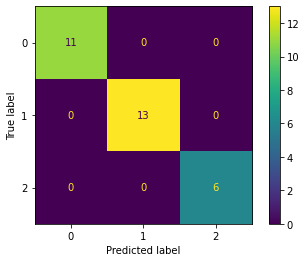

In [85]:
ConfusionMatrixDisplay.from_predictions(y_test,pred)

In [86]:
#Grid Search

In [90]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score

In [91]:
params={'kernel':['linear','rbf'],"gamma":[0.1,0.01,0.5]}

In [92]:
model=SVC()

In [97]:
gsv=GridSearchCV(model,params,cv=10,verbose=30)

In [98]:
gsv.fit(x_train,y_train)

Fitting 10 folds for each of 6 candidates, totalling 60 fits
[CV 1/10; 1/6] START gamma=0.1, kernel=linear...................................
[CV 1/10; 1/6] END ....gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 2/10; 1/6] START gamma=0.1, kernel=linear...................................
[CV 2/10; 1/6] END ....gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 3/10; 1/6] START gamma=0.1, kernel=linear...................................
[CV 3/10; 1/6] END ....gamma=0.1, kernel=linear;, score=0.917 total time=   0.0s
[CV 4/10; 1/6] START gamma=0.1, kernel=linear...................................
[CV 4/10; 1/6] END ....gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 5/10; 1/6] START gamma=0.1, kernel=linear...................................
[CV 5/10; 1/6] END ....gamma=0.1, kernel=linear;, score=1.000 total time=   0.0s
[CV 6/10; 1/6] START gamma=0.1, kernel=linear...................................
[CV 6/10; 1/6] END ....gamma=0.1, kernel=linear;

GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'gamma': [0.1, 0.01, 0.5],
                         'kernel': ['linear', 'rbf']},
             verbose=30)

In [99]:
gsv.best_params_

{'gamma': 0.1, 'kernel': 'linear'}